In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

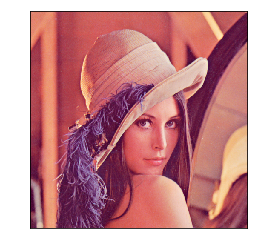

In [2]:
img = cv2.imread('../../data/lena_std.tif')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.xticks(color="None")
plt.yticks(color="None")
plt.tick_params(length=0)
plt.show()

In [4]:
from itertools import product

def split_range(x: np.ndarray, n_split: int):
    ret = list()
    splits = np.linspace(0, 256, n_split+1).astype(int)
    for s1, s2 in zip(splits, splits[1:]):
        ret.append(np.logical_and(x >= s1, x < s2))
    return ret

blues = split_range(img[:, :, 0], 4)
greens = split_range(img[:, :, 1], 4)
reds = split_range(img[:, :, 2], 4)
colors = [r & g & b for r, g, b in product(reds, greens, blues)]

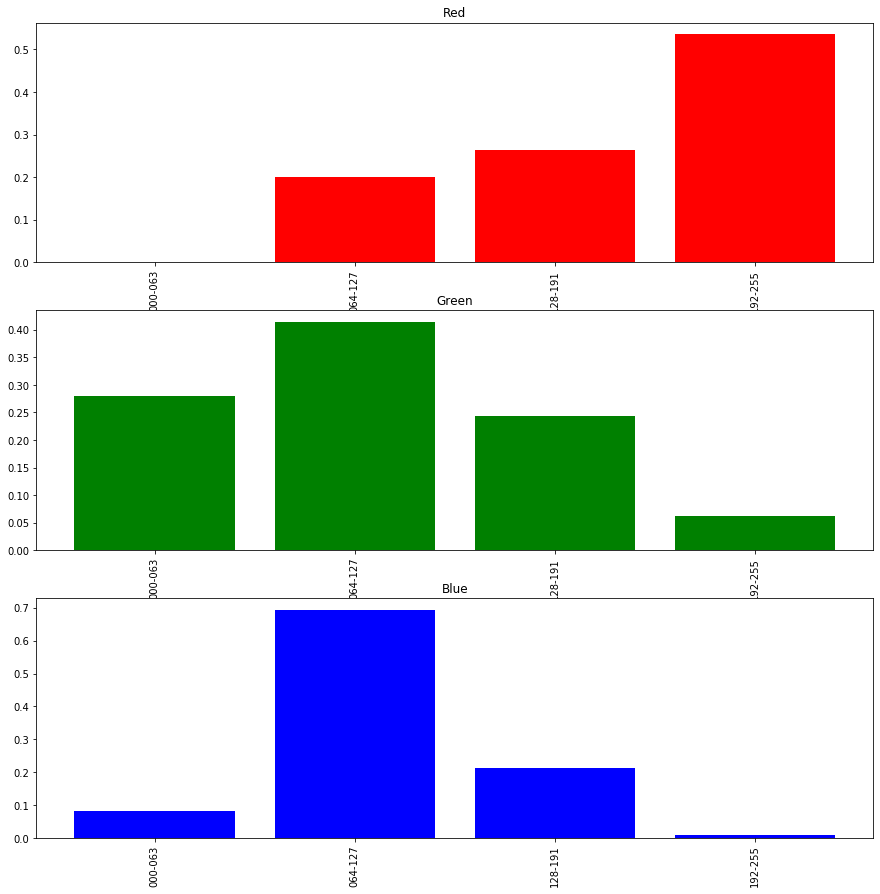

In [5]:
tick_label = ['000-063', '064-127', '128-191', '192-255']
long_tick_label = [r + ', ' + g + ', ' + b for r, g, b in product(tick_label, tick_label, tick_label)]

plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.bar(np.arange(4), list(map(np.mean, reds)), tick_label=tick_label, color='r')
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Red')

plt.subplot(3, 1, 2)
plt.bar(np.arange(4), list(map(np.mean, greens)), tick_label=tick_label, color='g')
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Green')

plt.subplot(3, 1, 3)
plt.bar(np.arange(4), list(map(np.mean, blues)), tick_label=tick_label, color='b')
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Blue')
plt.show()

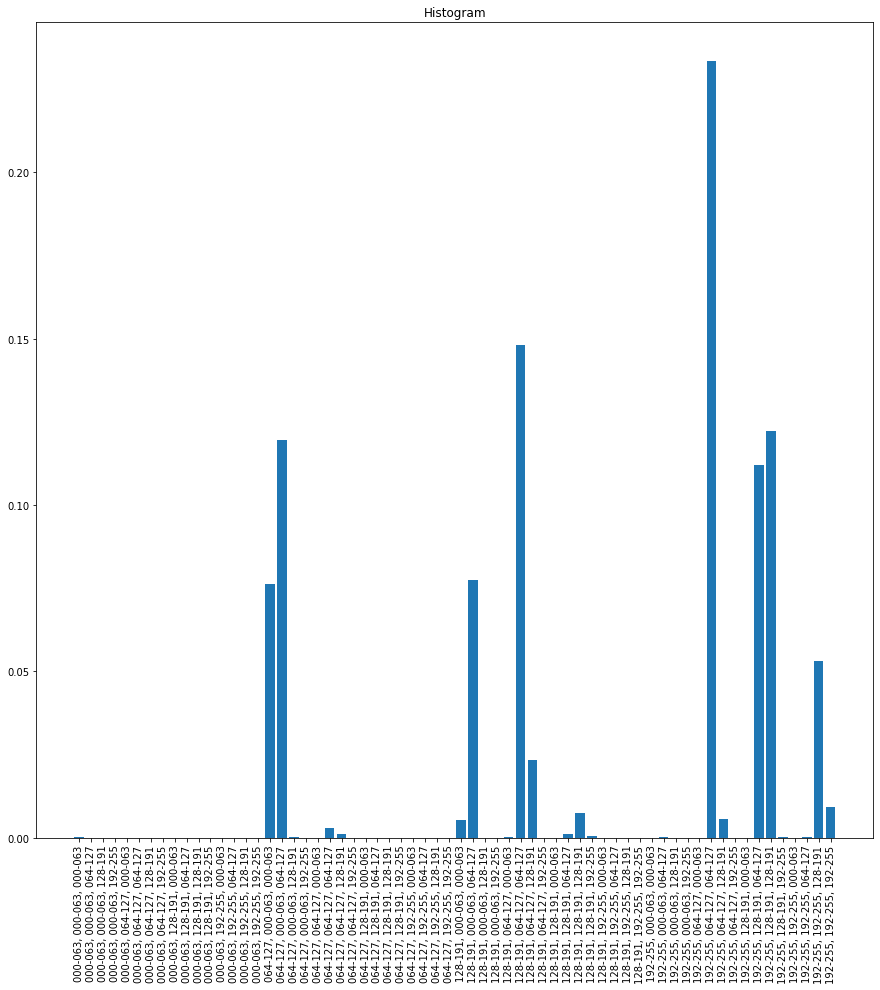

In [6]:
plt.figure(figsize=(15, 15))

plt.bar(np.arange(4**3), list(map(np.mean, colors)), tick_label=long_tick_label)
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Histogram')
plt.show()